<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [16]:
import math
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [17]:
# Load data from scikit-learn, which returns (data, target)
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

In [18]:
#use linear regression in sklearn
reg = linear_model.LinearRegression().fit(train_data, train_target)

#intercept and coefficents
print('Intercept:', reg.intercept_)
print('Coefficents:', reg.coef_)

# show errors on testing dataset
prediction = reg.predict(test_data)
  # built in loss functions
mse = metrics.mean_squared_error(test_target, prediction)
mae = metrics.mean_absolute_error(test_target, prediction)
print("sklearn MSE: ", mse, "sklearn MAE:", mae)

  #different implementation of MSE
def meanSquaredError(target, prediction):
  if(target.shape != prediction.shape):
    raise Exception('Shape Mismatch')
  size = prediction.shape[0]
  squaredLoss = np.square(np.subtract(target, prediction))
  mse = np.sum(squaredLoss)/(2*size)
  return mse

print('Assigned implementation of MSE:', meanSquaredError(test_target, prediction))

Intercept: [30.28894834]
Coefficents: [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]
sklearn MSE:  24.31142692969376 sklearn MAE: 3.1915089722748458
Assigned implementation of MSE: 12.15571346484688


<h4>Linear regression using normal equation</h4>

In [19]:
# normal form implementation on linear regression
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
  #add bias
  X = np.insert(X, 0, 1, axis=1)
  weights = np.dot(linalg.inv(np.dot(X.T, X)),np.dot(X.T, y))
  return weights

# Prediction function
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  #add bias
  X = np.insert(X, 0, 1, axis=1)
  predictions = np.matmul(X, w)
  return predictions

# train data to find weights
w = myNormalEqualFun(train_data,train_target)

# show intercept and coefficents
print("Intercept:", w[0])
print("Coefficents:", w[1:])

# show errors on training dataset and testing dataset
train_predictions = myPredictFun(train_data, w)
test_predictions = myPredictFun(test_data, w)

print("Training Dataset MSE:", meanSquaredError(train_predictions,train_target))
print("Testing Dataset MSE:", meanSquaredError(test_predictions,test_target))



Intercept: [30.28894834]
Coefficents: [[-1.12463481e-01]
 [ 3.00810168e-02]
 [ 4.07309919e-02]
 [ 2.78676719e+00]
 [-1.72406347e+01]
 [ 4.43248784e+00]
 [-6.23998173e-03]
 [-1.44848504e+00]
 [ 2.62113793e-01]
 [-1.06390978e-02]
 [-9.16398679e-01]
 [ 1.24516469e-02]
 [-5.09349120e-01]]
Training Dataset MSE: 10.820787048327793
Testing Dataset MSE: 12.155713464847317


<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

Intercept: [22.73606282] 
Coefficents: [-1.1209216   0.89826204  0.28093489  0.84823079 -1.86027469  2.73683654
 -0.45718373 -3.20827463  2.01635302 -1.42644684 -1.8941591   1.03177483
 -4.04807139]
[23.02700781 17.42926737]
Train MSE: 10.959272176379187 
Test MSE: 11.932585810092625


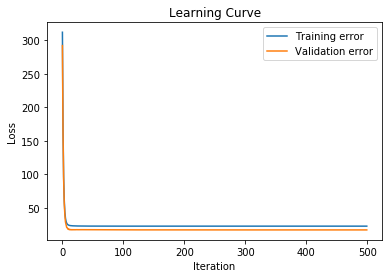

In [20]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Linear regression function using gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
  #add bias
  X = np.insert(X, 0, 1, axis=1)  
    
  #split training dataset into training and validation datasets
    #get 1/5th of dataset size
  fifth = int(X.shape[0] * .2)
  val_data, X = np.split(X, [fifth], axis = 0)
  val_target, y = np.split(y, [fifth], axis = 0)

  #initialize weights, loss = 0 ; reshape weights for matmul
  numOfLabels = X.shape[0]
  numOfWeights = X.shape[1]
  weights = np.zeros(numOfWeights).reshape((numOfWeights,1))
  loss = np.zeros((numItrs,2))
 
  #appy gradient descent and record loss for every iteration
  for i in range(numItrs):
    gradient = (-1/numOfLabels) * np.matmul(X.T, y - np.matmul(X, weights))
    weights = weights - (gradient*learning_rate)
    loss[i][0] = np.mean(np.square(y-np.matmul(X, weights)))#training loss
    loss[i][1] = np.mean(np.square(val_target-np.matmul(val_data, weights))) #validation loss
   
  return weights, loss


# Train model and predict testing set
w, loss = myGradientDescentFun(train_data,train_target,.3,500)
predictions = myPredictFun(test_data, w)

# Task 3-3: show intercept and coefficents
intercept = w[0].reshape((1,))
coefficents = w[1:].reshape((13,))
print("Intercept:", intercept, "\nCoefficents:", coefficents)

                                              
# show errors on training dataset and validation dataset
print(loss[loss.shape[0]-1])
tpredictions = myPredictFun(train_data, w)
trainMSE = meanSquaredError(train_target, tpredictions)
testMSE = meanSquaredError(test_target, predictions)
print("Train MSE:", trainMSE, "\nTest MSE:", testMSE)

# plot learning curves showing training errors and validation errors along iterations
fig, ax = plt.subplots()
ax.plot(np.arange(loss.shape[0]),loss)
ax.set(xlabel = "Iteration", ylabel = "Loss", title = "Learning Curve")
ax.legend(("Training error", "Validation error"))
plt.show()



<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

Intercept: [22.73979928] 
Coefficents: [-1.07997395  0.81065283  0.19545981  0.83877199 -1.79769726  2.75565381
 -0.44789439 -3.20386242  1.66493713 -1.02772875 -1.87392819  1.0365335
 -4.02996955]
Train MSE: 10.972628360779408 
Test MSE: 12.03070996951056


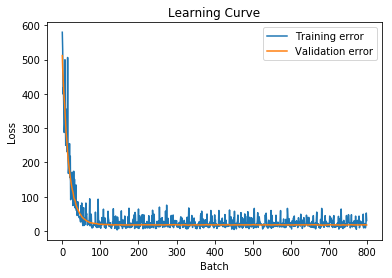

In [21]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Linear regression function using stochastic gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate, epoches, batchsize):
  #add bias
  X = np.insert(X, 0, 1, axis=1)
    
  #split training dataset into training and validation datasets
  #get 1/5th of dataset size
  fifth = int(X.shape[0] * .2)
  val_data, X = np.split(X, [fifth], axis = 0)
  val_target, y = np.split(y, [fifth], axis = 0)
  
  numOfLabels = X.shape[0]
  numOfWeights = X.shape[1]
  numOfBatches = int(numOfLabels/batchsize)
  
  #initialize loss and weights
  loss = np.zeros((epoches * numOfBatches, 2))
  weights = np.zeros(numOfWeights).reshape((numOfWeights,1))
  for i in range(epoches):
    #combine data and target, shuffle, and split them back into data and target
    shuffle = np.concatenate((X, y), axis = 1)
    np.random.shuffle(shuffle)
    X, y = np.split(shuffle, [numOfWeights], axis = 1)
    
    #perform GD on each batch
    for j in range(numOfBatches):
      data_batch = X[j*batchsize :(j+1) * batchsize]
      target_batch = y[j*batchsize : (j+1) * batchsize]
      gradient = (-1/data_batch.shape[0]) * np.matmul(data_batch.T, target_batch - np.matmul(data_batch, weights) )
      weights = weights - (gradient*learning_rate)
      loss[i*numOfBatches+j][0] = np.mean(np.square(target_batch-np.matmul(data_batch, weights)))
      loss[i*numOfBatches+j][1] = np.mean(np.square(val_target-np.matmul(val_data, weights))) #validation loss
  return weights, loss


#train the model and get weights
w, loss = myGradientDescentFun(train_data,train_target,0.03,50,20)
predictions = myPredictFun(test_data, w)

# show intercept and coefficents
intercept = w[0].reshape((1,))
coefficents = w[1:].reshape((13,))
print("Intercept:", intercept, "\nCoefficents:", coefficents)

                                              
# show errors on training dataset and validation dataset
tpredictions = myPredictFun(train_data, w)
trainMSE = meanSquaredError(train_target, tpredictions)
testMSE = meanSquaredError(test_target, predictions)
print("Train MSE:", trainMSE, "\nTest MSE:", testMSE)

# plot learning curves showing training errors and validation errors along both
fig, ax = plt.subplots()
ax.plot(np.arange(loss.shape[0]),loss)
ax.set(xlabel = "Batch", ylabel = "Loss", title = "Learning Curve")
ax.legend(("Training error", "Validation error"))
plt.show()




<h2>Batch Size Analysis</h2>

Elapsed time: 0.09999871253967285
Intercept: [22.5780283] 
Coefficents: [-0.93060972  0.45175339  0.06168029  0.94262571 -1.0987084   3.13932436
 -0.45748653 -2.16573217  0.70344195 -0.27216069 -1.76218379  1.06013169
 -3.75807265]
Train MSE: 11.231370267027673 
Test MSE: 12.883102227012929


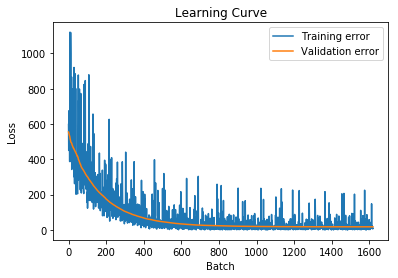

In [22]:
#check runtimes
start_time = time.time()
w, loss = myGradientDescentFun(train_data,train_target,0.003,20,4)
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time)
predictions = myPredictFun(test_data, w)

#show intercepts and weights
intercept = w[0].reshape((1,))
coefficents = w[1:].reshape((13,))
print("Intercept:", intercept, "\nCoefficents:", coefficents)

                                              
#show errors on training dataset and testing dataset
tpredictions = myPredictFun(train_data, w)
trainMSE = meanSquaredError(train_target, tpredictions)
testMSE = meanSquaredError(test_target, predictions)
print("Train MSE:", trainMSE, "\nTest MSE:", testMSE)

#plot learning curves showing training errors and validation errors along both
fig, ax = plt.subplots()
ax.plot(np.arange(loss.shape[0]),loss)
ax.set(xlabel = "Batch", ylabel = "Loss", title = "Learning Curve")
ax.legend(("Training error", "Validation error"))
plt.show()

Elapsed time: 0.05199909210205078
Intercept: [14.12625357] 
Coefficents: [-0.82890294  0.51122434 -0.16291608  1.30048027 -0.47180349  2.7882402
 -0.3232013  -0.67340552  0.02090061 -0.27981833 -1.53559753  0.87208118
 -2.46056513]
Train MSE: 50.662891773411566 
Test MSE: 52.29522557795606


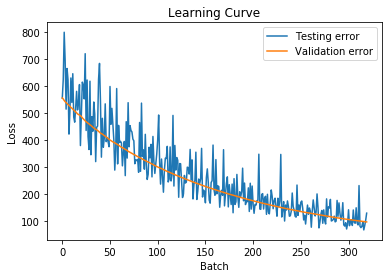

In [23]:
#check runtimes
start_time = time.time()
w, loss = myGradientDescentFun(train_data,train_target,0.003,20,20)
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time)
predictions = myPredictFun(test_data, w)

#show intercepts and weights
intercept = w[0].reshape((1,))
coefficents = w[1:].reshape((13,))
print("Intercept:", intercept, "\nCoefficents:", coefficents)

                                              
#show errors on training dataset and testing dataset
tpredictions = myPredictFun(train_data, w)
trainMSE = meanSquaredError(train_target, tpredictions)
testMSE = meanSquaredError(test_target, predictions)
print("Train MSE:", trainMSE, "\nTest MSE:", testMSE)

#plot learning curves showing training errors and validation errors along both
fig, ax = plt.subplots()
ax.plot(np.arange(loss.shape[0]),loss)
ax.set(xlabel = "Batch", ylabel = "Loss", title = "Learning Curve")
ax.legend(("Testing error", "Validation error"))
plt.show()

Elapsed time: 0.02399897575378418
Intercept: [2.60036623] 
Coefficents: [-0.32562349  0.29425787 -0.27455115  0.34302336 -0.30728343  0.73889937
 -0.24923281  0.1141451  -0.25305238 -0.30869287 -0.49818863  0.30783567
 -0.7002677 ]
Train MSE: 230.71789617596124 
Test MSE: 209.80182224128285


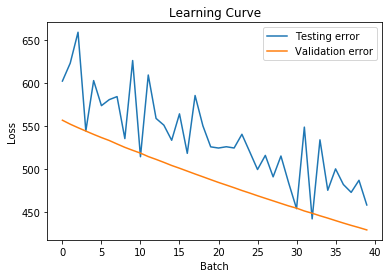

In [24]:
#check runtimes
start_time = time.time()
w, loss = myGradientDescentFun(train_data,train_target,0.003,20,150)
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time)
predictions = myPredictFun(test_data, w)

#show intercepts and weights
intercept = w[0].reshape((1,))
coefficents = w[1:].reshape((13,))
print("Intercept:", intercept, "\nCoefficents:", coefficents)

                                              
#show errors on training dataset and testing dataset
tpredictions = myPredictFun(train_data, w)
trainMSE = meanSquaredError(train_target, tpredictions)
testMSE = meanSquaredError(test_target, predictions)
print("Train MSE:", trainMSE, "\nTest MSE:", testMSE)

#plot learning curves showing training errors and validation errors along both
fig, ax = plt.subplots()
ax.plot(np.arange(loss.shape[0]),loss)
ax.set(xlabel = "Batch", ylabel = "Loss", title = "Learning Curve")
ax.legend(("Testing error", "Validation error"))
plt.show()